In [1]:
import tweepy
import json
import pandas as pd

In [2]:
consumer_key = "consumer_key"
consumer_secret = "consumer_secret"
access_token = "access_token"
access_token_secret = "access_token_secret"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True) 



In [10]:
results=[]

timeline = tweepy.Cursor(api.user_timeline, screen_name='@rahulgandhi', tweet_mode="extended").items(300)

for status in timeline:
    data = (
    status.user.id,
    status.user.screen_name,
    status.user.name,
    status.full_text,
    status.created_at,
    )
    results.append(data)

cols = "user_id screen_name name text date".split()
df = pd.DataFrame(results, columns=cols)

In [15]:
df.to_csv('tweets_rahul_timelinetweetrecent.txt' , sep=',' , encoding = 'utf-8')

In [21]:
df2=pd.read_csv('tweets_rahul_timelinetweetrecent.txt' , error_bad_lines=False)
df2

b'Skipping line 180: expected 5 fields, saw 7\n'


,Unnamed: 0,screen_name,text,date,lang
0,3,RahulGandhi,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03,NaN
1,4,RahulGandhi,If there was no intelligence failure then a 1:...,2021-04-05 04:26:26,NaN
2,5,RahulGandhi,My condolences to the families of the martyrs ...,2021-04-04 07:40:03,NaN
3,6,RahulGandhi,Celebrating hope and new beginnings- Happy Eas...,2021-04-04 03:01:42,NaN
4,7,RahulGandhi,Election “Commission”.,2021-04-03 14:09:09,NaN
...,...,...,...,...,...
198,203,RahulGandhi,Modi Govt’s apathy &amp; arrogance have claime...,2021-01-05 08:50:31,NaN
199,204,RahulGandhi,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17,NaN
200,205,RahulGandhi,"The Modi government, which is unable to provid...",2021-01-03 11:16:23,NaN
201,206,RahulGandhi,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06,NaN


In [22]:
df2.drop(columns=['Unnamed: 0','lang'],axis=1 , inplace=True)

In [18]:
df2

,screen_name,text,date
0,RahulGandhi,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03
1,RahulGandhi,If there was no intelligence failure then a 1:...,2021-04-05 04:26:26
2,RahulGandhi,My condolences to the families of the martyrs ...,2021-04-04 07:40:03
3,RahulGandhi,Celebrating hope and new beginnings- Happy Eas...,2021-04-04 03:01:42
4,RahulGandhi,Election “Commission”.,2021-04-03 14:09:09
...,...,...,...
198,RahulGandhi,Modi Govt’s apathy &amp; arrogance have claime...,2021-01-05 08:50:31
199,RahulGandhi,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17
200,RahulGandhi,"The Modi government, which is unable to provid...",2021-01-03 11:16:23
201,RahulGandhi,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06


In [23]:
df2.to_csv('tweets_rahul_timelinetweetrecent.csv' , sep=',')

In [4]:
df2=pd.read_csv('tweets_rahul_timelinetweetrecent.csv' )
df2

,Unnamed: 0,screen_name,text,date
0,0,RahulGandhi,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03
1,1,RahulGandhi,If there was no intelligence failure then a 1:...,2021-04-05 04:26:26
2,2,RahulGandhi,My condolences to the families of the martyrs ...,2021-04-04 07:40:03
3,3,RahulGandhi,Celebrating hope and new beginnings- Happy Eas...,2021-04-04 03:01:42
4,4,RahulGandhi,Election “Commission”.,2021-04-03 14:09:09
...,...,...,...,...
198,198,RahulGandhi,Modi Govt’s apathy &amp; arrogance have claime...,2021-01-05 08:50:31
199,199,RahulGandhi,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17
200,200,RahulGandhi,"The Modi government, which is unable to provid...",2021-01-03 11:16:23
201,201,RahulGandhi,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06


In [5]:
df2.drop(columns=['Unnamed: 0'],axis=1 , inplace=True)

In [6]:
import re


def cleanTxt(txt):
    
    txt = re.sub(r'@[A-Za-z0-9_:]+', '' , txt)
    
    txt = re.sub(r'#', '' , txt)
    
    txt = re.sub(r'RT[\s]+','',txt)
    
    txt = re.sub(r'https?:\/\/\S+','',txt)
    
    txt = re.sub(r'\d+', '', txt)
    return txt

df2['text'] = df2["text"].apply(cleanTxt)

In [7]:
df2

,screen_name,text,date
0,RahulGandhi,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03
1,RahulGandhi,If there was no intelligence failure then a : ...,2021-04-05 04:26:26
2,RahulGandhi,My condolences to the families of the martyrs ...,2021-04-04 07:40:03
3,RahulGandhi,Celebrating hope and new beginnings- Happy Eas...,2021-04-04 03:01:42
4,RahulGandhi,Election “Commission”.,2021-04-03 14:09:09
...,...,...,...
198,RahulGandhi,Modi Govt’s apathy &amp; arrogance have claime...,2021-01-05 08:50:31
199,RahulGandhi,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17
200,RahulGandhi,"The Modi government, which is unable to provid...",2021-01-03 11:16:23
201,RahulGandhi,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06


In [8]:
df2.to_csv('tweets_rahul_timelinetweetrecent1.csv' , sep=',')

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
#Removing punctation
df2['text'] = df2['text'].str.translate(str.maketrans(" ", " ", string.punctuation))

In [11]:
df2

,screen_name,text,date
0,RahulGandhi,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03
1,RahulGandhi,If there was no intelligence failure then a d...,2021-04-05 04:26:26
2,RahulGandhi,My condolences to the families of the martyrs ...,2021-04-04 07:40:03
3,RahulGandhi,Celebrating hope and new beginnings Happy Easter,2021-04-04 03:01:42
4,RahulGandhi,Election “Commission”,2021-04-03 14:09:09
...,...,...,...
198,RahulGandhi,Modi Govt’s apathy amp arrogance have claimed ...,2021-01-05 08:50:31
199,RahulGandhi,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17
200,RahulGandhi,The Modi government which is unable to provide...,2021-01-03 11:16:23
201,RahulGandhi,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06


In [12]:
#FOR  SENTIMENT LABELLING WE HAVE TO IMPORT  NLKT 


import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
def print_sentiment_scores(tweets):
    vadersenti = analyser.polarity_scores(tweets)
    return pd.Series([vadersenti['pos'], vadersenti['neg'], vadersenti['neu'], vadersenti['compound']])

In [14]:
df2[['vadersenti_pos', 'vadersenti_neg', 'vadersenti_neu', 'vadersenti_compound']]  = df2['text'].apply(print_sentiment_scores)

In [15]:
df2['senti'] = 'neutral'
df2.loc[df2['vadersenti_compound'] > 0 , 'senti'] = 'positive'
df2.loc[df2['vadersenti_compound'] < 0,'senti'] = 'negative'

df2['vader_possentiment'] = 0
df2.loc[df2['vadersenti_compound'] > 0 , 'vader_possentiment'] = 1

df2['vader_negsentiment'] = 0
df2.loc[df2['vadersenti_compound'] < 0 , 'vader_negsentiment'] = 1

df2['vader_neusentiment'] = 0
df2.loc[(df2['vadersenti_compound'] <0) & (df2['vadersenti_compound'] >=0) , 'vader_neusentiment'] = 1

In [16]:
df2

,screen_name,text,date,vadersenti_pos,vadersenti_neg,vadersenti_neu,vadersenti_compound,senti,vader_possentiment,vader_negsentiment,vader_neusentiment
0,RahulGandhi,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03,0.000,0.213,0.787,-0.6908,negative,0,1,0
1,RahulGandhi,If there was no intelligence failure then a d...,2021-04-05 04:26:26,0.073,0.174,0.754,-0.5792,negative,0,1,0
2,RahulGandhi,My condolences to the families of the martyrs ...,2021-04-04 07:40:03,0.251,0.121,0.628,0.8360,positive,1,0,0
3,RahulGandhi,Celebrating hope and new beginnings Happy Easter,2021-04-04 03:01:42,0.720,0.000,0.280,0.8834,positive,1,0,0
4,RahulGandhi,Election “Commission”,2021-04-03 14:09:09,0.000,0.000,1.000,0.0000,neutral,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
198,RahulGandhi,Modi Govt’s apathy amp arrogance have claimed ...,2021-01-05 08:50:31,0.055,0.308,0.637,-0.8979,negative,0,1,0
199,RahulGandhi,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17,0.068,0.093,0.839,-0.2732,negative,0,1,0
200,RahulGandhi,The Modi government which is unable to provide...,2021-01-03 11:16:23,0.185,0.000,0.815,0.5994,positive,1,0,0
201,RahulGandhi,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06,0.130,0.097,0.773,0.1280,positive,1,0,0


In [17]:
ptweets = df2[df2.senti == 'positive'] 
ptweets = ptweets['text']

round(   (ptweets.shape[0]/ df2.shape[0])*100 , 1)

42.9

In [18]:
ptweets = df2[df2.senti == 'negative'] 
ptweets = ptweets['text']

round(   (ptweets.shape[0]/ df2.shape[0])*100 , 1)

39.4

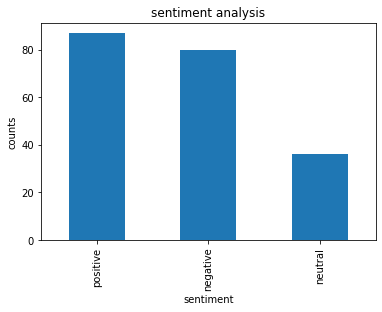

In [19]:
import matplotlib.pyplot as plt
df2['senti'].value_counts()

plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df2['senti'].value_counts().plot(kind='bar')
plt.show()

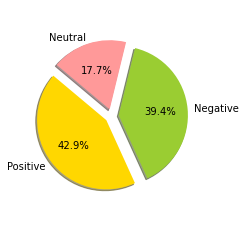

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (3,4))
wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"} # Width = 1
# Data to plot
labels = 'Positive', 'Negative', 'Neutral'
sizes = [42.9,39.4,17.7]
colors = ['gold', 'yellowgreen', '#ff9999']
explode = (0.1, 0.1, 0.1)  # explode 1st slice
radius = 3.2
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [19]:
df2=df2.drop(['screen_name','vadersenti_pos','vadersenti_neg','vadersenti_neu','vader_possentiment','vader_negsentiment','vader_neusentiment'],axis=1)

In [20]:
df2

,text,date,vadersenti_compound,senti
0,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03,-0.6908,negative
1,If there was no intelligence failure then a d...,2021-04-05 04:26:26,-0.5792,negative
2,My condolences to the families of the martyrs ...,2021-04-04 07:40:03,0.8360,positive
3,Celebrating hope and new beginnings Happy Easter,2021-04-04 03:01:42,0.8834,positive
4,Election “Commission”,2021-04-03 14:09:09,0.0000,neutral
...,...,...,...,...
198,Modi Govt’s apathy amp arrogance have claimed ...,2021-01-05 08:50:31,-0.8979,negative
199,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17,-0.2732,negative
200,The Modi government which is unable to provide...,2021-01-03 11:16:23,0.5994,positive
201,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06,0.1280,positive


In [21]:
df2=df2.drop(['vadersenti_compound'],axis=1)

In [22]:
def get_tweets_Sentiment(sentiment_score):
    if sentiment_score == 'negative':
        return '-1'
    elif sentiment_score == 'neutral':
        return '0'
    else:
        return '1'
    
df2['Sentiment_Score'] = df2['senti'].apply(get_tweets_Sentiment)

In [23]:
df2

,text,date,senti,Sentiment_Score
0,No Indian jawan should face an enemy without b...,2021-04-05 08:12:03,negative,-1
1,If there was no intelligence failure then a d...,2021-04-05 04:26:26,negative,-1
2,My condolences to the families of the martyrs ...,2021-04-04 07:40:03,positive,1
3,Celebrating hope and new beginnings Happy Easter,2021-04-04 03:01:42,positive,1
4,Election “Commission”,2021-04-03 14:09:09,neutral,0
...,...,...,...,...
198,Modi Govt’s apathy amp arrogance have claimed ...,2021-01-05 08:50:31,negative,-1
199,In the fierce rain of winter Under the drippin...,2021-01-04 04:33:17,negative,-1
200,The Modi government which is unable to provide...,2021-01-03 11:16:23,positive,1
201,The country is going to face a tragedy like Ch...,2021-01-03 04:46:06,positive,1


In [24]:
df2=df2.drop(['date'],axis=1)

In [25]:
df2

,text,senti,Sentiment_Score
0,No Indian jawan should face an enemy without b...,negative,-1
1,If there was no intelligence failure then a d...,negative,-1
2,My condolences to the families of the martyrs ...,positive,1
3,Celebrating hope and new beginnings Happy Easter,positive,1
4,Election “Commission”,neutral,0
...,...,...,...
198,Modi Govt’s apathy amp arrogance have claimed ...,negative,-1
199,In the fierce rain of winter Under the drippin...,negative,-1
200,The Modi government which is unable to provide...,positive,1
201,The country is going to face a tragedy like Ch...,positive,1


In [26]:
df2.to_csv('tweets_rahul_timelinetweetrecentFINAL.csv' , sep=',')

In [2]:
df3 = pd.read_csv('tweets_rahul_timelinetweetrecentFINAL.csv')

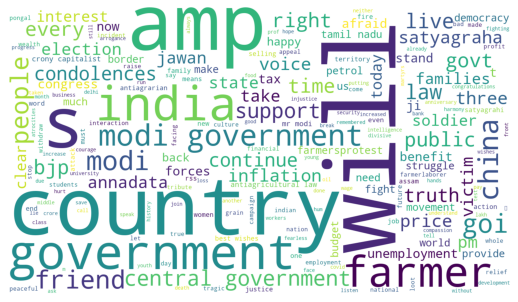

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df3.text:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1400, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
